In [92]:
FN_compare = [783, 733, 664, 619, 570, 519, 458, 393, 321, 255, 206, 153, 108, 74, 52, 28, 15, 10, 8, 8, 6, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

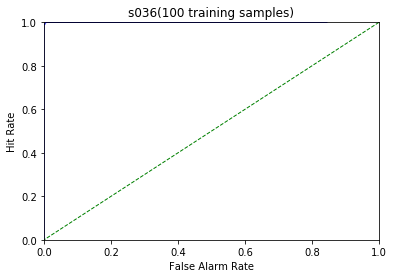

In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

path = './result/pohmm_result/100_train/'
file = 's036_100train_verification_results_out.csv'
fileName = path + file

df = pd.read_csv(fileName)

#正样本
df_positive = df[df["genuine"]==True]
df_sort_positive = df_positive.sort_values(by=['score'])
df_95percent_positive = df_sort_positive[19:380]
mean = df_95percent_positive["score"].mean()
df_score_positive = df_sort_positive["score"]

distance_positive = list( map(lambda x: abs(x - mean), df_score_positive) )
distance_array_positive = np.array(distance_positive)

#负样本
df_negative = df[df["genuine"]==False]
df_sort_negative = df_negative.sort_values(by=['score'])
df_score_negative = df_sort_negative["score"]

distance_negative = list( map(lambda x: abs(x - mean), df_score_negative) )
distance_array_negative = np.array(distance_negative)

#判断函数
def judge(threshold,distance_array):
    out_num = np.sum((distance_array > threshold)) 
    return out_num

threshold_range = np.linspace(1,150,500)

FN = [0]*len(threshold_range)
TP = [0]*len(threshold_range)
FP = [0]*len(threshold_range)
TN = [0]*len(threshold_range)

false_alarm_rate = [0.0]*len(threshold_range)
miss_rate = [0.0]*len(threshold_range)
recall = [0.0]*len(threshold_range)
precision = [0.0]*len(threshold_range)

for i,threshold in enumerate(threshold_range):
    #print('threshold is:',threshold)
    
    out_num = judge(threshold,distance_positive)
    #print('out_num is:',out_num)
    out_num_all = judge(threshold,distance_array_negative)
    #print('out_num_all is:', out_num_all)
     
    FN[i] = out_num
    TP[i] = 400 - out_num
    FP[i] = 2500 -  out_num_all
    TN[i] = out_num_all

    false_alarm_rate[i] = FP[i]/(FP[i]+TN[i])
    miss_rate[i] = FN[i]/(TP[i]+FN[i])
    recall[i] = TP[i]/(TP[i]+FN[i])
    precision[i] = TP[i]/(TP[i]+FP[i])
    
#根据Kevin的定义：
False_Alarm_Rate = list( map(lambda x: x/400, FN) )
Miss_Rate = list( map(lambda x: x/2500, FP) )
Hit_Rate = list( map(lambda x: 1 - x, Miss_Rate) )
plt.plot(False_Alarm_Rate,Hit_Rate,color="blue",linewidth=1)
plt.plot(Hit_Rate,Hit_Rate,'g--',linewidth=1)

plt.title('s036(100 training samples)')
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [4]:
'''
print('FN = ', FN)
print('TP = ', TP)
print('FP = ', FP)
print('TN = ', TN)
'''
print('FN = ', FN)

FN =  [338, 321, 307, 295, 281, 263, 253, 240, 222, 210, 195, 187, 165, 155, 144, 133, 124, 109, 101, 94, 86, 75, 65, 64, 63, 60, 55, 50, 43, 39, 35, 31, 27, 23, 19, 15, 15, 14, 13, 13, 12, 12, 12, 11, 11, 10, 9, 8, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [5]:
five_Percent_index = FN.index(19)

In [6]:
FP[five_Percent_index]/2500

0.0

In [7]:
F1=[0.0]*len(TP)
for i in range(len(TP)):
    F1[i] = 2*TP[i]/(2*TP[i]+FP[i]+FN[i])

In [8]:
F1[five_Percent_index]

0.9756722151088348

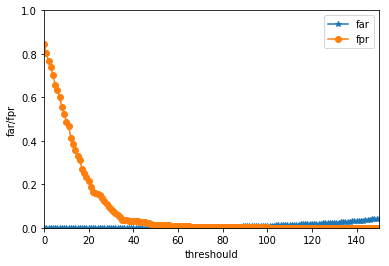

In [9]:
plt.figure()
plt.plot(false_alarm_rate,marker = '*', label = 'far')
plt.plot(miss_rate, marker = 'o', label = 'fpr')
plt.legend()
plt.xlim([0,150])
plt.ylim([0,1])
plt.xlabel('threshould')
plt.ylabel('far/fpr')
plt.show()

In [16]:
miss_rate[60]

0.01

In [17]:
false_alarm_rate[60]

0.0